# Tiri per Squadra

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import urllib
import os
import numpy as np

In [37]:
font_path = "../Grafici/assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../Grafici/assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [81]:
df = pd.read_csv("./data/shooting.csv", sep='\t').set_index('Rk')[['Player', 'Gls', 'Sh', '90s']]
#df.plot.scatter('Sh', 'Gls')
df = df[df['90s'] >= 10]

In [82]:
def remove_noGls_noSh(df):
    for i in df.index:
        if df.loc[i].Gls == 0 or df.loc[i].Sh == 0:
            df.drop(i, inplace=True)
remove_noGls_noSh(df)

def per_90(x, n):
    return x/n
    
df = df.assign(Gls_90 = lambda x: x.Gls/x["90s"])
df = df.assign(Sh_90 = lambda x: x.Sh/x["90s"])
df

,Player,Gls,Sh,90s,Gls_90,Sh_90
Rk,,,,,,
3,Tammy Abraham,8,62,24.1,0.331950,2.572614
7,Michel Aebischer,1,15,16.1,0.062112,0.931677
12,Jean-Daniel Akpa-Akpro,1,13,14.1,0.070922,0.921986
13,Luis Alberto,5,43,26.1,0.191571,1.647510
17,Bruno Amione,1,12,22.2,0.045045,0.540541
...,...,...,...,...,...,...
575,Duván Zapata,2,41,15.5,0.129032,2.645161
576,Davide Zappacosta,4,24,15.4,0.259740,1.558442
581,Piotr Zieliński,3,52,24.7,0.121457,2.105263


## Visual

In [67]:
def plot_line(m, ax, **kwargs):
    op = lambda x: m*x
    x = [ax.get_ylim()[0]-5, ax.get_xlim()[1]+5]
    ax.plot(x, [op(x[0]), op(x[1])], **kwargs)

def ann(ax, pl, a=0, b=0):
    ax.annotate(pl.Player, xy=(0,0), xytext=(pl.Sh_90+a, pl.Gls_90+b) )

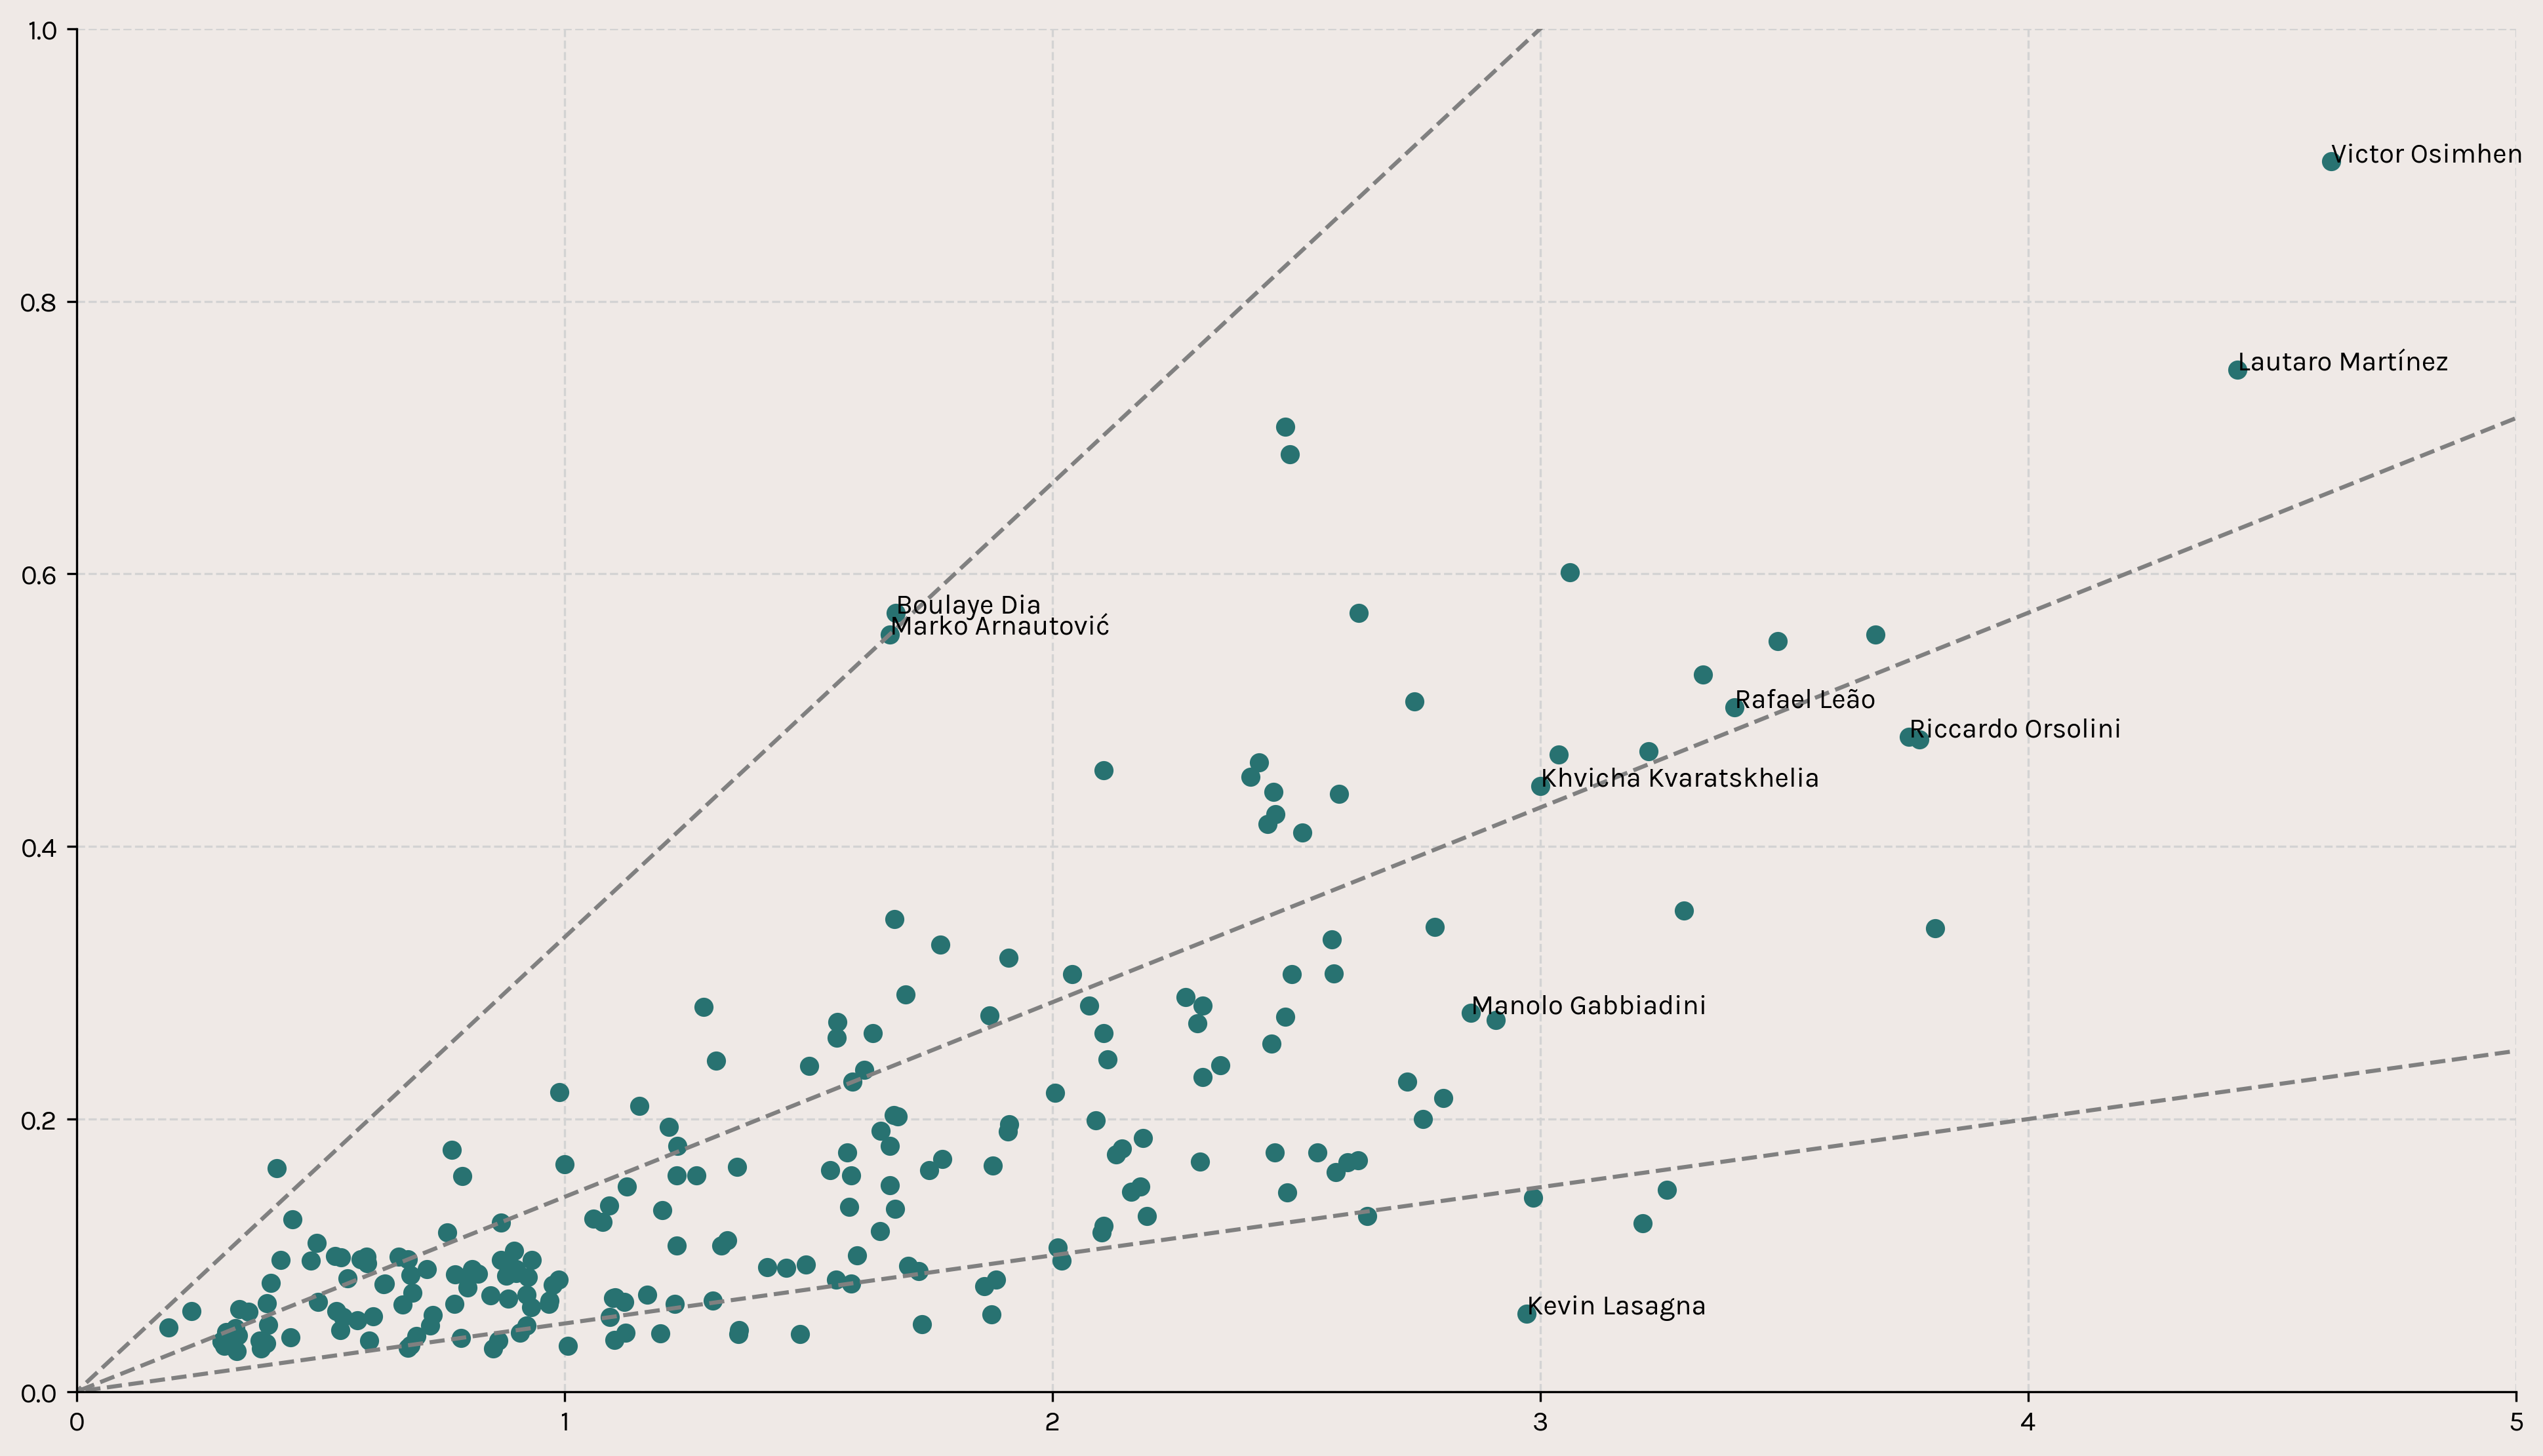

In [88]:
fig = plt.figure(figsize=(16, 9), dpi=300)
ax = plt.subplot()
ax.grid(visible=True, ls='--', color='lightgrey')
'''
ax.set_ylim(-1, 26)
ax.set_xlim(-3, 140)
ax.set_ylabel("Goals")
ax.set_xlabel("Tiri")
ax.xaxis.set_ticks([x for x in range(0, 145, 5)])
ax.yaxis.set_ticks([x for x in range(0, 27, 2)])
'''

ann(ax, df[df.Gls == 25].iloc[0])
ann(ax, df[df.Gls == 21].iloc[0])
ann(ax, df[df.Gls == 16].iloc[0])
ann(ax, df[(df.Gls == 9) & (df.Sh < 30)].iloc[0])
ann(ax, df[df.Sh == 88].iloc[0])
ann(ax, df[df.Sh == 86].iloc[0])
ann(ax, df[(df.Sh == 52) & (df.Gls == 1)].iloc[0])
ann(ax, df[(df.Sh == 72) & (df.Gls == 7)].iloc[0])
ann(ax, df[df.Player == "Khvicha Kvaratskhelia"].iloc[0])

'''
ax.annotate("1 Gol ogni 20 tiri", xy=(0, 0), xytext=(125, 5.5)).set_rotation(7)
ax.annotate("1 Gol ogni 7 tiri", xy=(0, 0), xytext=(127, 17.5)).set_rotation(23)
ax.annotate("1 Gol ogni 3 tiri", xy=(0, 0), xytext=(71, 23)).set_rotation(45)
'''

ax.set_ylim(0, 1)
ax.set_xlim(0, 5)

ax.scatter(
    df.Sh_90, df.Gls_90,
    zorder=2
)

plot_line(1/20, ax, color='grey', ls='--')
plot_line(1/7, ax, color='grey', ls='--')
plot_line(1/3, ax, color='grey', ls='--')


//TODO: applicare colore gradiente, vedere notion per guida
//TODO: impostare nomi (vedere per nomi https://theanalyst.com/eu/2022/10/italian-serie-a-stats-2022-23/)
//TODO: settare linee dashed
//TODO: impostare font https://www.sonofacorner.com/the-epl-qb/